In [47]:

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # Ensure this import is included
df = pd.read_csv(r'C:\Users\hp\Downloads\archive (1)\sentimentdataset.csv', encoding='latin-1')
print(df.head())


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! ðª       ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [48]:


print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User  

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
# 1. Extract and Count Unique Hashtags
# Ensure Hashtags are in string format and split them
df['Hashtags'] = df['Hashtags'].astype(str)
all_hashtags = df['Hashtags'].str.split(' ').explode()
hashtag_counts = Counter(all_hashtags)

In [51]:
 #Convert to DataFrame for easier handling
hashtag_df = pd.DataFrame(hashtag_counts.most_common(20), columns=['Hashtag', 'Count'])#

           Hashtag  Count
0                    7539
1        #Serenity     15
2       #Gratitude     13
3      #Excitement     13
4         #Despair     11
5       #Nostalgia     11
6     #Contentment     10
7       #Curiosity     10
8             #Awe      9
9           #Grief      9
10     #Loneliness      9
11        #Hopeful      9
12     #Enthusiasm      8
13            #Joy      8
14     #Acceptance      8
15      #Confusion      8
16    #Inspiration      7
17        #Elation      7
18       #Euphoria      7
19  #Determination      7


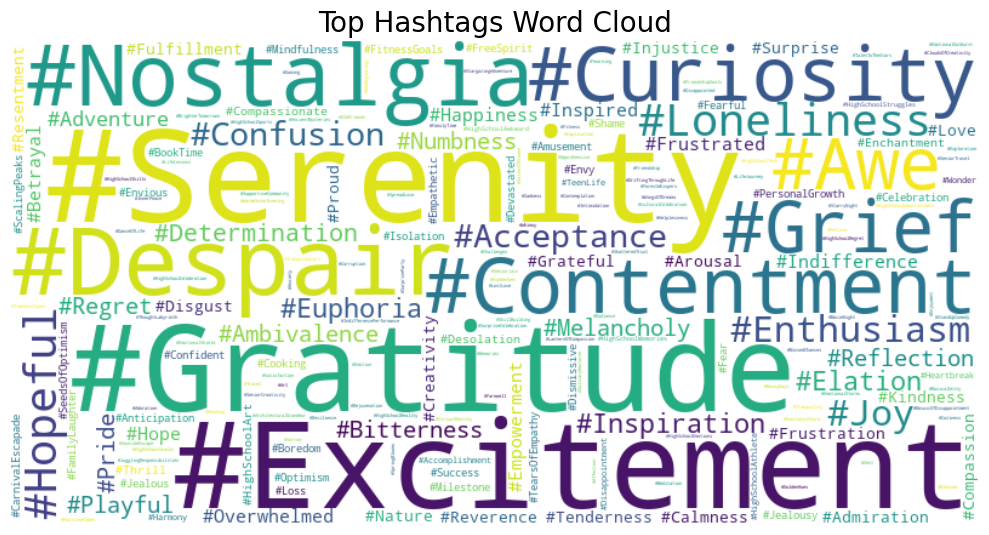

In [52]:
print(hashtag_df)  # Display top hashtags

# 2. Generate a Word Cloud of Top Hashtags
# 2. Generate a Word Cloud of Top Hashtags
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(hashtag_counts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Top Hashtags Word Cloud', fontsize=20)
plt.tight_layout()
plt.savefig('top_hashtags_word_cloud.png')
plt.show()

In [53]:
df['Hashtags'] = df['Hashtags'].astype(str)

In [54]:
from collections import Counter
all_hashtags = df['Hashtags'].str.split(' ').explode()
hashtag_counts = Counter(all_hashtags)
top_hashtags = pd.DataFrame(hashtag_counts.most_common(20), columns=['Hashtag', 'Count'])

In [55]:
import nltk
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)
df['clean_text'] = df['Text'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
all_words = ' '.join(df['clean_text']).split()
word_freq = Counter(all_words)
top_words = pd.DataFrame(word_freq.most_common(50), columns=['Word', 'Count'])

In [57]:
topics = {
    'Technology': ['tech', 'innovation', 'gadget', 'ai', 'virtualreality'],
    'Fitness': ['fitness', 'workout', 'health', 'exercise'],
    'Travel': ['travel', 'adventure', 'vacation', 'getaway'],
    'Nature': ['nature', 'park', 'hike', 'outdoors'],
    'Food': ['food', 'cooking', 'recipe', 'dinner'],
}

In [58]:
df['Hashtags'] = df['Hashtags'].astype(str)
all_hashtags = df['Hashtags'].str.split(' ').explode()
hashtag_counts = Counter(all_hashtags)
top_hashtags = pd.DataFrame(hashtag_counts.most_common(20), columns=['Hashtag', 'Count'])

In [59]:
def assign_topic(row):
    text = row['Text'].lower() + ' ' + row['Hashtags'].lower()
    for topic, keywords in topics.items():
        if any(keyword in text for keyword in keywords):
            return topic
    return 'Other'
df['Topic'] = df.apply(assign_topic, axis=1)

In [60]:
df.to_csv('processed_data.csv', index=False)
top_hashtags.to_csv('top_hashtags.csv', index=False)
top_words.to_csv('top_words.csv', index=False)

In [61]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\hp\AppData\Local\Temp\ipykernel_25332\2688381623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hashtags, x='Count', y='Hashtag', palette='viridis')


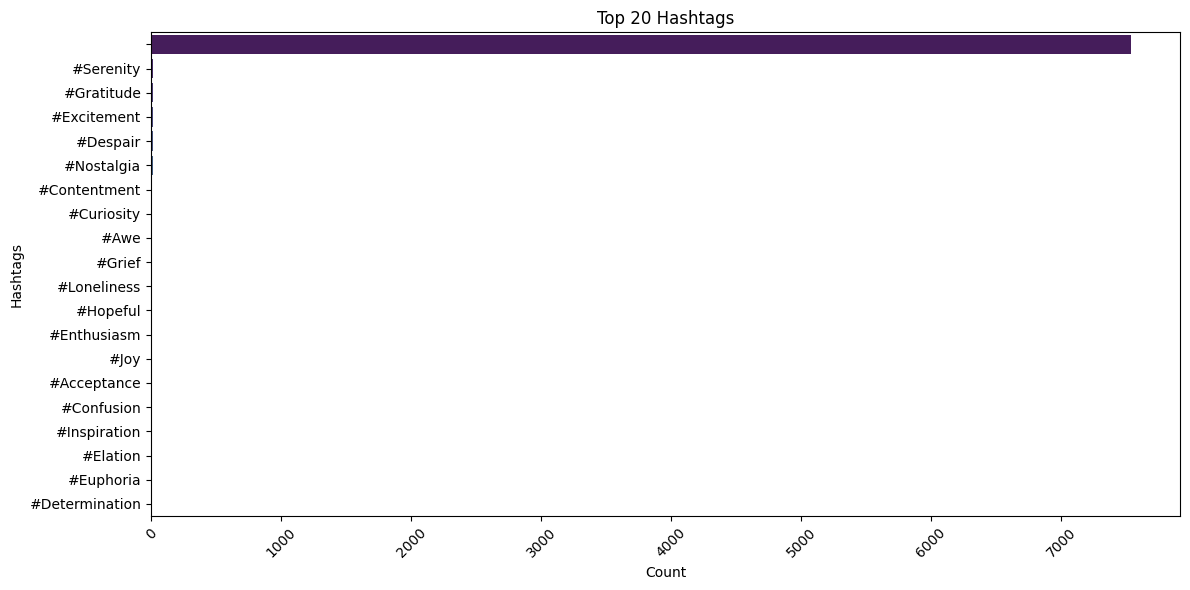

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Top Hashtags
plt.figure(figsize=(12, 6))
sns.barplot(data=top_hashtags, x='Count', y='Hashtag', palette='viridis')
plt.title('Top 20 Hashtags')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_hashtags.png')  # Save the figure
plt.show()
